In [1]:
import pandas as pd
import tqdm

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [47]:
train = pd.read_csv("data/train_set.csv")

In [6]:


short_train = pd.read_csv("short_train.csv")
long_train = pd.read_csv("long_train.csv")
all_train = pd.read_csv("all_train.csv")
new_train = train.rename(columns={'class': 'article_class'},inplace=False)




In [3]:
train.head()

,id,article,word_seg,class
0,0,7368 1252069 365865 755561 1044285 129532 1053...,816903 597526 520477 1179558 1033823 758724 63...,14
1,1,581131 165432 7368 957317 1197553 570900 33659...,90540 816903 441039 816903 569138 816903 10343...,3
2,2,7368 87936 40494 490286 856005 641588 145611 1...,816903 1012629 957974 1033823 328210 947200 65...,12
3,3,299237 760651 299237 887082 159592 556634 7489...,563568 1239563 680125 780219 782805 1033823 19...,13
4,4,7368 7368 7368 865510 7368 396966 995243 37685...,816903 816903 816903 139132 816903 312320 1103...,12


In [48]:
train = train.rename(columns={'class': 'article_class'}, inplace=False)

In [51]:
type(train.article_class.values[0])

numpy.int64

In [22]:
t1 = pd.DataFrame(['164643 54352 ','52522 525432','352534 5254','452534 523453 4352'],columns = ['word_seg'])

t2 = pd.DataFrame([5,6,7,8],columns = ['word_seg'])

In [23]:
list(t1.word_seg)+list(t2.word_seg)

['164643 54352 ',
 '52522 525432',
 '352534 5254',
 '452534 523453 4352',
 5,
 6,
 7,
 8]

In [75]:
l = [1,2,3,4,5]
w = l[2:10]
w

[3, 4, 5]

In [53]:
train_word_length = []
back = []
i = 0
article_class = train.article_class.values
y = []
for line in train.word_seg.values:

    line = line.split()
    if len(line)>1000:
        y.append(article_class[i])
    i +=1

In [70]:
l2000 = []
for line in train.word_seg.values:
    line = line.split()
    if len(line)>2000:
        l2000.append(len(line))
print(len(l2000))

4787


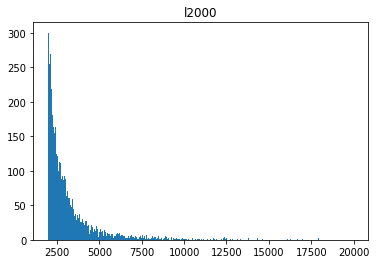

In [73]:
plt.hist(l2000, bins = list(range(2000,20000,50)))
plt.title("l2000")
plt.show()

In [86]:
for g in range(3):
    print(g)

0
1
2


In [117]:
#切分1000單位的train_set

split_train = []

i = 0
article_class = train.article_class.values
y = []
for line in train.word_seg.values:
    
    line = line.split()
    le = len(line)

    if le>1000:
        n = int(le/1000)

        for m in range(n+1):
            li = line[1000*m:1000*(m+1)]
            h = ' '.join(li)
            y.append(article_class[i])
            split_train.append(h)
    i +=1

In [40]:
#切分1000單位長度的test_set
test = pd.read_csv('data/test_set.csv')
split_test = []

i = 0
article_id = test.id.values
test_id = []
for line in test.word_seg.values:
    
    line1 = line.split()
    le = len(line1)

    if le>1000:
        if le%1000==0:
            n = int(le/1000)

            for m in range(n):
                li = line1[1000*m:1000*(m+1)]
                h = ' '.join(li)
                test_id.append(article_id[i])
                split_test.append(h)
        else:
            n = int(le/1000)

            for m in range(n+1):
                li = line1[1000*m:1000*(m+1)]
                h = ' '.join(li)
                test_id.append(article_id[i])
                split_test.append(h)
    else:
        split_test.append(line)
        test_id.append(article_id[i])
    i +=1

In [41]:
print(len(test_id))

131310


In [7]:
print(len(test_id))

131320


In [36]:
back_test = back_test.dropna(axis=0,how='any') 
len(back_test)

131320

In [42]:
back_test = pd.DataFrame({'id':test_id,'word_seg':split_test})

In [45]:
back_test.to_csv('data/back_test.csv')

In [14]:
test = pd.read_csv("data/back_test.csv")
x_test = list(test.word_seg)

In [17]:
len(x_test)

131320

In [44]:
back_test[19153:19157]

,id,word_seg
19153,14758,205402 584131 966562 1256802 520477 1275770 43...
19154,14759,414956 250402 458209 520477 20010 834740 37776...
19155,14759,596474 1191954 831818 844647 780339 995362 816...
19156,14760,816903 545370 1113057 1212070 63641 386932 460...


In [43]:
from tensorflow.contrib import learn
vocab_processor = learn.preprocessing.VocabularyProcessor(1000,500)
vocab_processor.fit(split_test)

In [ ]:
from tensorflow.contrib import learn

In [160]:
back_train = pd.read_csv('data/back_train.csv')

In [164]:
back_train[9618:9620]

,Unnamed: 0,word_seg,article_class
9618,9618,1035234 1016192 1045349 318929 995362 197012 2...,13
9619,9619,NaN,13


In [172]:
back3 = back_train.dropna(axis=0,how='any') 
back3[9618:9620]
len(back3),len(back_train)

(49136, 49145)

In [133]:
back_train2 = list(back_train.word_seg)

In [157]:
back_train2[9619]

nan

In [159]:
vocab_processor = learn.preprocessing.VocabularyProcessor(1000,500)
vocab_processor.fit(back_train2[9621:])

TypeError: expected string or bytes-like object

In [94]:
print(len(y))
print(len(split_train))
print(split_train[:5])

49145
49145
['90540 816903 441039 816903 569138 816903 1034376 997489 382714 1236006 520477 132364 1207796 89613 1033299 834740 133940 816903 848000 386932 520477 31046 766772 748483 481786 701424 522428 764656 572782 266161 432549 457828 968083 397939 323159 1033823 925313 520477 848000 220238 701424 500399 133940 816903 1256303 520477 1243427 520477 487094 993110 477703 768219 133940 1034376 140644 98991 1207796 569876 1130139 1033823 257190 878073 585102 1105940 985047 834740 520477 506606 266784 781202 566120 768219 133940 816903 31046 422170 441513 703615 847492 520477 300241 54111 1278725 173393 652252 133940 1014945 1231069 1046814 1033823 637864 520477 1121767 614484 572782 266161 432549 457828 968083 397939 426716 487693 525987 323159 1033823 512031 853939 896267 133940 816903 426716 457828 1115586 816903 682718 816903 703473 122061 816903 266161 432549 526298 487337 1033823 788176 54111 973043 1033823 620853 874881 520477 806905 487337 520261 960230 1033823 39741 138548 83474

In [101]:
type(y)

list

In [113]:
back_train = pd.DataFrame({'word_seg':split_train,'article_class':y})

In [119]:
back_train = pd.DataFrame(split_train,columns = ['word_seg'])

In [ ]:
back_train['article_class'] = y

In [173]:
back3.to_csv('data/back_train.csv')

In [122]:
back_train[:5]

,word_seg,article_class
0,90540 816903 441039 816903 569138 816903 10343...,3
1,270411 1033823 676152 520477 300241 514147 108...,3
2,1027375 674220 995362 342914 911176 526298 674...,3
3,679740 1226448 1025743 323033 1033823 460600 5...,3
4,816903 1012629 957974 1033823 328210 947200 65...,12


In [132]:
train[:5]

,id,article,word_seg,article_class
0,0,7368 1252069 365865 755561 1044285 129532 1053...,816903 597526 520477 1179558 1033823 758724 63...,14
1,1,581131 165432 7368 957317 1197553 570900 33659...,90540 816903 441039 816903 569138 816903 10343...,3
2,2,7368 87936 40494 490286 856005 641588 145611 1...,816903 1012629 957974 1033823 328210 947200 65...,12
3,3,299237 760651 299237 887082 159592 556634 7489...,563568 1239563 680125 780219 782805 1033823 19...,13
4,4,7368 7368 7368 865510 7368 396966 995243 37685...,816903 816903 816903 139132 816903 312320 1103...,12


In [114]:
print(len(back_train))
back_train[:5]

49145


,article_class,word_seg
0,3,90540 816903 441039 816903 569138 816903 10343...
1,3,270411 1033823 676152 520477 300241 514147 108...
2,3,1027375 674220 995362 342914 911176 526298 674...
3,3,679740 1226448 1025743 323033 1033823 460600 5...
4,12,816903 1012629 957974 1033823 328210 947200 65...


In [35]:
train_word_length = []
back = []

for line in train.word_seg.values:
    line = line.split()
    train_word_length.append(len(line))
#     if len(line)>1000:
#         line = line[-1000:]
#         h = ' '.join(line)
#         back.append(h)

In [50]:
test = pd.read_csv('data/test_set.csv')
test_word_length = []
back = []
for line in test.word_seg.values:

    line = line.split()
    test_word_length.append(len(line))

In [37]:
len(train_word_length)
train_word_length[:5]


[627, 3062, 1588, 467, 1297]

In [55]:
back_train['article_class'] = y

back_train.to_csv('data/back_train.csv')

In [116]:
back_train = list(back_train.word_seg)
back_train[:5]

['90540 816903 441039 816903 569138 816903 1034376 997489 382714 1236006 520477 132364 1207796 89613 1033299 834740 133940 816903 848000 386932 520477 31046 766772 748483 481786 701424 522428 764656 572782 266161 432549 457828 968083 397939 323159 1033823 925313 520477 848000 220238 701424 500399 133940 816903 1256303 520477 1243427 520477 487094 993110 477703 768219 133940 1034376 140644 98991 1207796 569876 1130139 1033823 257190 878073 585102 1105940 985047 834740 520477 506606 266784 781202 566120 768219 133940 816903 31046 422170 441513 703615 847492 520477 300241 54111 1278725 173393 652252 133940 1014945 1231069 1046814 1033823 637864 520477 1121767 614484 572782 266161 432549 457828 968083 397939 426716 487693 525987 323159 1033823 512031 853939 896267 133940 816903 426716 457828 1115586 816903 682718 816903 703473 122061 816903 266161 432549 526298 487337 1033823 788176 54111 973043 1033823 620853 874881 520477 806905 487337 520261 960230 1033823 39741 138548 834740 806785 257

In [44]:
list(range(0,10,2))

[0, 2, 4, 6, 8]

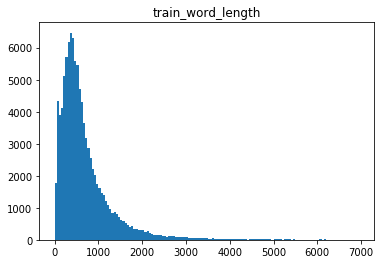

In [49]:
from matplotlib import pyplot as plt 
import numpy as np  
plt.hist(train_word_length, bins = list(range(0,7000,50)))
plt.title("train_word_length") 
plt.show()

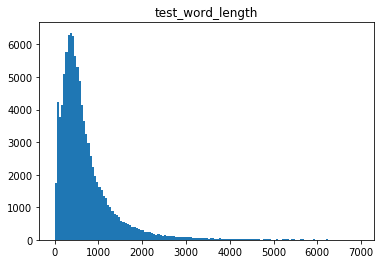

In [51]:
from matplotlib import pyplot as plt 
import numpy as np  
plt.hist(test_word_length, bins = list(range(0,7000,50)))
plt.title("test_word_length") 
plt.show()

In [32]:
len(back[4])

7154

In [31]:
back_train = pd.DataFrame(back,columns = ['word_seg'])

In [57]:
back_train.to_csv('data/back_train.csv')

In [34]:
len(back_train)

20099

In [58]:
back_y = pd.get_dummies(back_train['article_class']).values

In [66]:
temp1 = back_y[:5]
temp1

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]],
      dtype=uint8)

In [62]:
temp2 = back_y[5:10]

In [68]:
temp3 = np.concatenate((temp1,temp2),axis = 0)
temp3

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=uint8)

In [65]:
temp3

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [8]:
# data_length = pd.DataFrame({'article_len':[0]})

# x_article = list(new_train.article)

# x_word = list(new_train.word_seg)

# i = 0
# for x in x_article:
#     data_length.loc[i] = len(x.split(" "))
#     i += 1

# data_length['word_len']=0

# i = 0
# for x in x_word:
#     data_length['word_len'][i] = len(x.split(" "))
#     i += 1

# data_length.describe()

# data_length[(data_length['word_len']<7) | (data_length['article_len']<51) ]

# new_train.iloc[59251]

# all_train = pd.concat([new_train,data_length],axis=1)

# all_train.head()
# all_train.to_csv('all_train.csv')

sort_all = all_train.sort_values(["word_len"])
sort_all.head()

,Unnamed: 0,id,article,word_seg,article_class,article_len,word_len
61069,61069,61069,699820 699820 699820 699820 699820 699820 6998...,409779 816903 409779 816903 608182 1226448,12,123,6
59251,59251,59251,699820 699820 699820 699820 699820 699820 6998...,409779 816903 409779 816903 608182 1226448,12,123,6
60076,60076,60076,1120647 360394 40494 1080029 7368 1197553 2305...,235466 816903 467613 816903 684941 816903 2940...,19,71,17
69340,69340,69340,7368 828585 658597 79747 103648 112530 1038275...,816903 128289 1226448 874627 33633 1233653 816...,12,115,17
1915,1915,1915,881890 581131 1030656 626254 961786 581131 611...,386754 1224594 1234861 1224594 85838 816903 83...,19,75,22


In [11]:
all_train.describe()

,Unnamed: 0,id,article_class,article_len,word_len
count,102277.000000,102277.000000,102277.000000,102277.000000,102277.000000
mean,51138.000000,51138.000000,10.262356,1177.100159,716.954604
std,29524.971078,29524.971078,5.370785,1348.431565,801.804540
min,0.000000,0.000000,1.000000,50.000000,6.000000
25%,25569.000000,25569.000000,6.000000,497.000000,305.000000
50%,51138.000000,51138.000000,10.000000,842.000000,514.000000
75%,76707.000000,76707.000000,15.000000,1408.000000,862.000000
max,102276.000000,102276.000000,19.000000,55804.000000,39759.000000


In [9]:
#long_train = all_train.loc[all_train.article_len>1000]
#short_train = all_train.loc[all_train.article_len<1001]

In [10]:
len(long_train)

41511

In [11]:
long_train.head()

,Unnamed: 0,id,article,word_seg,article_class,article_len,word_len
0,0,0,7368 1252069 365865 755561 1044285 129532 1053...,816903 597526 520477 1179558 1033823 758724 63...,14,1047,627
1,1,1,581131 165432 7368 957317 1197553 570900 33659...,90540 816903 441039 816903 569138 816903 10343...,3,4785,3062
2,2,2,7368 87936 40494 490286 856005 641588 145611 1...,816903 1012629 957974 1033823 328210 947200 65...,12,2407,1588
3,4,4,7368 7368 7368 865510 7368 396966 995243 37685...,816903 816903 816903 139132 816903 312320 1103...,12,1974,1297
4,5,5,7368 1160791 299237 1238054 569999 1044285 117...,816903 669476 21577 520477 1004165 4184 616471...,13,3947,2548


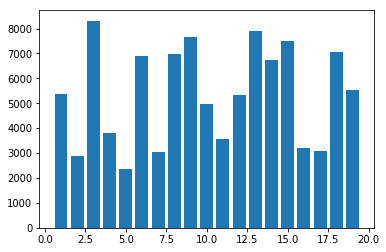

In [12]:

len_table = new_train['article_class'].value_counts()

len_table

len_table = len_table.sort_index()

y = len_table.values

type(y)

x = list(range(1,20))

plt.bar(range(1,20,1),y)
plt.show()

In [13]:
long_table = long_train['article_class'].value_counts()

<BarContainer object of 19 artists>

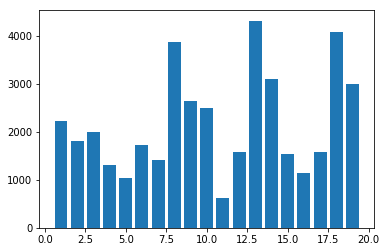

In [14]:
long_table = long_table.sort_index()
ly = long_table.values
plt.bar(range(1,20,1),ly)

In [15]:
short_table

NameError: name 'short_table' is not defined

In [16]:
len_table

1     5375
2     2901
3     8313
4     3824
5     2369
6     6888
7     3038
8     6972
9     7675
10    4963
11    3571
12    5326
13    7907
14    6740
15    7511
16    3220
17    3094
18    7066
19    5524
Name: article_class, dtype: int64

<BarContainer object of 19 artists>

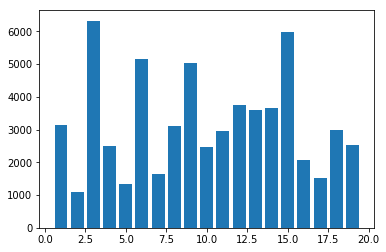

In [17]:
short_table = short_train['article_class'].value_counts()
short_table = short_table.sort_index()
ly = short_table.values
plt.bar(range(1,20,1),ly)

In [18]:
len(long_train)
len(short_train)

60766

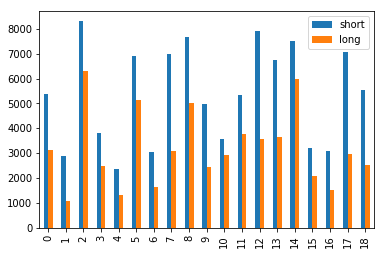

In [19]:
df = pd.DataFrame(np.array([y,ly]).T,columns=['short','long']).plot.bar()

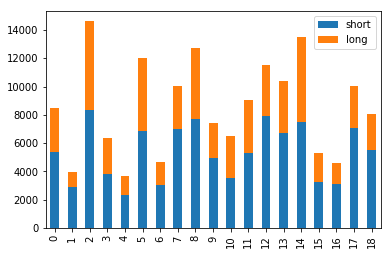

In [20]:
df = pd.DataFrame(np.array([y,ly]).T,columns=['short','long']).plot.bar(stacked=True)

In [21]:
def length_table(table):

    len_table = table['article_class'].value_counts()

    len_table = len_table.sort_index()
    y = len_table.values

    plt.bar(range(1,20,1),y)
    plt.show()

In [ ]:
pd.read_csv('enhance_data.csv')

In [46]:
#all_enhance = new_train.copy()
#all_enhance2 = pd.DataFrame()

for i in range(20):
    classi = all_enhance.loc[all_enhance2.article_class==i]
    classi_d = classi.copy()
    classi_d.word_seg = np.random.permutation(classi.word_seg.values)
    classi_d.article = np.random.permutation(classi.article.values)
    if (len(classi)<10000):
        all_classi = pd.concat([classi,classi_d],axis=0)
    else:
        all_classi = classi
    all_enhance2 = pd.concat([all_enhance2,all_classi],axis=0)
length_table(all_enhance2)

ValueError: cannot reindex from a duplicate axis

In [44]:
drop_list = np.random.randint(118974,128826,size=3000)
drop_list = np.unique(drop_list)
print(drop_list[:5],len(drop_list))
print(len(all_enhance2))
enhance_data = all_enhance2.drop(enhance_data.index[list(drop_list)])
print(len(all_enhance2),len(enhance_data))
length_table(enhance_data)

[118974 118979 118981 118983 118985] 2604
204554


NameError: name 'enhance_data' is not defined

In [24]:
enhance_data.to_csv('enhance_data.csv')

NameError: name 'enhance_data' is not defined

In [25]:
#enhance_data = all_enhance2.copy()
enhance_data.drop(118972)
enhance_data[118970:118980]

NameError: name 'enhance_data' is not defined

In [26]:
#enhance_data = all_enhance2.copy()
enhance_data = enhance_data.drop(enhance_data.index[[118976,118973]])
enhance_data[118970:118980]

NameError: name 'enhance_data' is not defined

In [27]:
enhance_data.shape

NameError: name 'enhance_data' is not defined

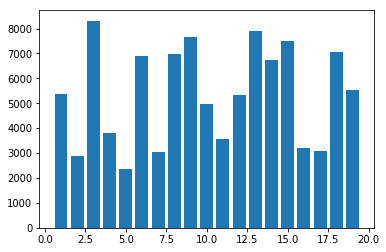

In [28]:


type(y)

x = list(range(1,20))

plt.bar(range(1,20,1),y)
plt.show()

In [29]:
class1 = all_train.loc[all_train.article_class==1]
class1_d = class1.copy()
class1_d.word_seg = np.random.permutation(class1.word_seg.values)
class1_d.article = np.random.permutation(class1.article.values)

In [30]:
np.random.rand(10, 4)

array([[0.25097316, 0.3049541 , 0.2719386 , 0.57003659],
       [0.35951561, 0.05439847, 0.79591565, 0.83807303],
       [0.33381776, 0.23562483, 0.71180429, 0.18034866],
       [0.76399618, 0.38293861, 0.91998316, 0.07423802],
       [0.10888044, 0.75798299, 0.73053331, 0.74155051],
       [0.79638712, 0.32284959, 0.35389378, 0.33819636],
       [0.45623007, 0.25158508, 0.60426233, 0.16727638],
       [0.10576718, 0.41436304, 0.67863563, 0.96677144],
       [0.01234356, 0.26781123, 0.96680334, 0.80369139],
       [0.07666986, 0.74097709, 0.26960075, 0.10927462]])

In [31]:
long_train.describe()

,Unnamed: 0,id,article_class,article_len,word_len
count,41511.000000,41511.000000,41511.000000,41511.000000,41511.000000
mean,50829.368601,50829.368601,10.753656,2102.269085,1275.185348
std,29577.356344,29577.356344,5.509307,1714.584649,1010.715437
min,0.000000,0.000000,1.000000,1001.000000,74.000000
25%,25077.500000,25077.500000,7.000000,1236.000000,756.000000
50%,50802.000000,50802.000000,11.000000,1604.000000,982.000000
75%,76250.000000,76250.000000,15.000000,2330.000000,1418.000000
max,102275.000000,102275.000000,19.000000,55804.000000,39759.000000


In [32]:
long_train.shape

(41511, 7)

In [33]:
class2 = all_train.loc[all_train.article_class==2]
class2_s= class2
class2_s.word_seg = np.random.permutation(class2.word_seg.values)
class2_s.article = np.random.permutation(class2.article.values)

/home/ginko/.local/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [34]:
def dropout(d,p=0.3):
        len_ = len(d)
        index = np.random.choice(len_,int(len_*p))
        d[index]=0
        return d     

In [35]:

class2 = all_train.loc[all_train.article_class==2]
class2_d = class2.copy()
sentences=[]
for sentence in class2_d.word_seg:
    sentence = list(map(int,(sentence.split())))
    sentence = np.array(sentence)
    sentence = dropout(sentence)
    sentences.append(dropout(sentence))
class2_d.word_seg = str(sentences)

characters=[]

for character in class2_d.article:
    character = list(map(int,(character.split())))
    character = np.array(character)
    character = dropout(character)
    characters.append(dropout(character))
class2_d.article = characters

In [36]:
class2

,Unnamed: 0,id,article,word_seg,article_class,article_len,word_len
23,23,23,330242 788037 40494 1080029 79747 7368 1015617...,713291 135124 1226448 816903 69892 520477 3696...,2,1344,748
40,40,40,881890 581131 1030656 626254 826453 581131 611...,386754 166959 1234861 166959 866203 816903 816...,2,1014,637
89,89,89,415555 1269463 1176703 493242 249303 119827 77...,362928 273817 613610 834740 960761 1033823 248...,2,2516,1318
95,95,95,442871 177198 663773 873355 649585 1111942 736...,563297 1022450 816903 806905 277944 1122314 72...,2,946,548
169,169,169,556634 837240 239992 530023 1123801 1218217 27...,3849 1127790 10188 806755 460600 1134165 13814...,2,529,295
176,176,176,7368 1177293 269807 656831 690980 206763 12596...,816903 856115 289954 960860 1005033 674551 234...,2,500,294
181,181,181,7368 1069392 776048 330242 758098 177198 83655...,816903 870553 260177 1138348 1033823 785181 10...,2,1356,819
197,197,197,7368 316709 171803 1266092 177198 7368 297797 ...,816903 36028 898058 816903 238458 561409 16695...,2,302,193
327,327,327,7368 1220011 1017514 7368 371412 103127 595261...,816903 16476 816903 1255425 433405 876569 8169...,2,184,115
448,448,448,1035104 311096 75959 617883 348926 177198 8560...,1197717 114395 734667 1033823 229718 460600 73...,2,477,301


In [37]:
class2_d

,Unnamed: 0,id,article,word_seg,article_class,article_len,word_len
23,23,23,"[330242, 0, 0, 1080029, 79747, 0, 0, 0, 0, 471...","[array([ 0, 135124, 0, 816903, ...",2,1344,748
40,40,40,"[0, 0, 1030656, 626254, 0, 0, 611112, 826453, ...","[array([ 0, 135124, 0, 816903, ...",2,1014,637
89,89,89,"[415555, 0, 0, 0, 0, 0, 7792, 0, 1161763, 6860...","[array([ 0, 135124, 0, 816903, ...",2,2516,1318
95,95,95,"[442871, 0, 663773, 873355, 649585, 0, 0, 0, 3...","[array([ 0, 135124, 0, 816903, ...",2,946,548
169,169,169,"[556634, 837240, 0, 0, 1123801, 1218217, 27271...","[array([ 0, 135124, 0, 816903, ...",2,529,295
176,176,176,"[0, 1177293, 269807, 656831, 690980, 206763, 1...","[array([ 0, 135124, 0, 816903, ...",2,500,294
181,181,181,"[7368, 1069392, 776048, 330242, 758098, 177198...","[array([ 0, 135124, 0, 816903, ...",2,1356,819
197,197,197,"[0, 0, 171803, 1266092, 177198, 7368, 297797, ...","[array([ 0, 135124, 0, 816903, ...",2,302,193
327,327,327,"[0, 0, 1017514, 7368, 371412, 0, 0, 0, 308719,...","[array([ 0, 135124, 0, 816903, ...",2,184,115
448,448,448,"[1035104, 0, 75959, 617883, 0, 177198, 856005,...","[array([ 0, 135124, 0, 816903, ...",2,477,301


In [38]:
l = [1,2,3,4,5]

In [39]:
l[np.array([1,3])]

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
class2_d = class2
sentences=[]
list(int(sentence.split())) for sentence in class2_d.word_seg:
    print(type(sentence),len(sentence))
    dropout(sentence)
    sentences.append(dropout(sentence))


In [ ]:
class1 = all_train.loc[all_train.article_class==1]

class1_d = class1

class1_d.word_seg = np.random.permutation(class1.word_seg.values)

class1_d.article = np.random.permutation(class1.article.values)

In [ ]:
import pandas as pd, numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import svm

In [ ]:
column = "word_seg"
train = pd.read_csv('data/train_set.csv')
test = pd.read_csv('data/test_set.csv')
test_id = test["id"].copy()
vec = TfidfVectorizer(ngram_range=(1,2),min_df=3, max_df=0.9,use_idf=1,smooth_idf=1, sublinear_tf=1)
trn_term_doc = vec.fit_transform(train[column])
test_term_doc = vec.transform(test[column])


In [ ]:
y=(train["class"]-1).astype(int)

In [ ]:
# Randomly shuffle data
np.random.seed(10)
shuffle_indices = np.random.permutation(np.arange(len(y)))
x_shuffled = trn_term_doc[shuffle_indices]
y_shuffled = y[shuffle_indices]

# Split train/test set
# TODO: This is very crude, should use cross-validation
dev_sample_index = -1 * int(0.02 * float(len(y)))
x_train, x_dev = x_shuffled[:dev_sample_index], x_shuffled[dev_sample_index:]
y_train, y_dev = y_shuffled[:dev_sample_index], y_shuffled[dev_sample_index:]

del x_shuffled, y_shuffled

#print("Vocabulary Size: {:d}".format(len(x_train)))
print("Train/Dev split: {:d}/{:d}".format(len(y_train), len(y_dev)))

In [ ]:
x_train.shape
type(x_train)

In [ ]:
type(trn_term_doc)

In [40]:
trn_term_doc.shape

NameError: name 'trn_term_doc' is not defined

In [41]:
test_term_doc.shape

NameError: name 'test_term_doc' is not defined

In [42]:
enhance_data.shape

NameError: name 'enhance_data' is not defined